# INFOMATION

### python info
 - Version : 3.6.10
 - Anaconda ver 4.8.2
 
### package info
 - tensorflow ver 1.8.0
 - numpy ver 1.16.4
 - pandas ver 0.22.0

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import qgrid

# SETTING

 ### tuning
  - hyper parameter 튜닝
  

In [2]:
tf.set_random_seed(777)

### Funtion
 - Standardization
     >
 - Min-Max scaling
     > 최소값과 최대값을 이용하여 0~1사이의 값으로 변환한다.
     
 - reverse_min_max_scalin
     > Min-Max scaling을 역 정규화 한다.

In [3]:
# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7)

# reverse_min_max_scaling
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

### Variable
 - hyper parameter

In [4]:
input_data_cnt = 3  # 입력데이터의 컬럼 개수
output_data_cnt = 1  # 결과데이터의 컬럼 개수

seq_length = 5  # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 15  # 각 셀의 (hidden)출력 크기
forget_bias = 1.0  # 망각편향(기본값 1.0)
num_stacked_layers = 1  # stacked LSTM layers 개수
keep_prob = 1.0  # dropout할 때 keep할 비율

epoch_num = 1200  # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.001  # 학습률

 - load data

In [5]:
path = ''
file_name = 'test_kk.csv' 
encoding = 'UTP-8'  # 문자 인코딩

raw_dataframe = pd.read_csv(path+file_name)

qgrid.show_grid(raw_dataframe,show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [6]:
# 시계열 데이터 제거
del raw_dataframe['date']
# del raw_dataframe['policy']

raw_dataframe[0:3]

,examcnt,spread,policy,cnt
0,119,0.035,0.0,1
1,55,0.035,0.0,1
2,105,0.035,0.0,1


In [7]:
# 부동소수점형으로 변환
info = raw_dataframe.values[1:].astype(np.float)

info[0:3]

array([[5.50e+01, 3.50e-02, 0.00e+00, 1.00e+00],
       [1.05e+02, 3.50e-02, 0.00e+00, 1.00e+00],
       [4.98e+02, 3.50e-02, 0.00e+00, 1.00e+00]])

 - preprocessing

In [8]:
# X Data
x_info = info[:,:-1]
# :1 = examcnt , 1:2 = spread , 2:3 = 



scaling_x = min_max_scaling(x_info)

scaling_x

array([[2.35556127e-03, 1.49899353e-06, 0.00000000e+00],
       [4.49698060e-03, 1.49899353e-06, 0.00000000e+00],
       [2.13285366e-02, 1.49899353e-06, 0.00000000e+00],
       [2.19281340e-02, 1.49899353e-06, 0.00000000e+00],
       [4.50982911e-02, 3.42627093e-07, 0.00000000e+00],
       [8.46288920e-02, 1.49899353e-06, 0.00000000e+00],
       [1.32682342e-01, 2.99798707e-06, 0.00000000e+00],
       [2.12300313e-01, 5.18223479e-06, 0.00000000e+00],
       [1.89472783e-01, 1.49899353e-05, 0.00000000e+00],
       [2.71788942e-01, 1.23345754e-05, 0.00000000e+00],
       [3.17101375e-01, 8.99396120e-06, 0.00000000e+00],
       [5.55270033e-01, 1.23345754e-05, 0.00000000e+00],
       [5.39380702e-01, 1.60178166e-05, 0.00000000e+00],
       [5.97199024e-01, 9.67921538e-06, 0.00000000e+00],
       [5.17152769e-01, 1.41761960e-05, 0.00000000e+00],
       [1.83305495e-01, 2.99798707e-06, 0.00000000e+00],
       [4.36592574e-01, 2.99798707e-06, 0.00000000e+00],
       [6.70692535e-01, 1.19919

In [9]:
# Y Data
y_info = info[:,-1:]
scaling_y = min_max_scaling(y_info)

scaling_y

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00833333],
       [0.05      ],
       [0.075     ],
       [0.06666667],
       [0.04166667],
       [0.06666667],
       [0.1       ],
       [0.05833333],
       [0.08333333],
       [0.00833333],
       [0.00833333],
       [0.05833333],
       [0.075     ],
       [0.08333333],
       [0.1       ],
       [0.04166667],
       [0.09166667],
       [0.09166667],
       [0.075     ],
       [0.03333333],
       [0.03333333],
       [0.11666667],
       [0.075     ],
       [0.15      ],
       [0.25833333],
       [0.1       ],
       [0.13333333],
       [0.06666667],
       [0.06666667],
       [0.11666667],
       [0.08333333],
       [0.06666667],
       [0.125     ],
       [0.075     ],
       [0.09166667],
       [0.08333333],
       [0.05833333],
       [0.03333333],
       [0.04166667],
       [0.11666667],
       [0.075     ],
       [0.15 

In [10]:
# Concatenate
# print('concat')
# x = np.concatenate((scaling_x, scaling_y), axis=1)
# print('x data frist array :: ',x[0])
# print('x data last array  :: ',x[-1])

# y = x[:,[-1]]
# print('y data frist array :: ',y[0])
# print('y data last array  :: ',y[-1])

# print('=' * 80)

# not Concatenate
print('Not concat')

x = scaling_x
print('x data frist array :: ',x[0])
print('x data last array  :: ',x[-1])

y = scaling_y
print('y data frist array :: ',y[0])
print('y data last array  :: ',y[-1])

Not concat
x data frist array ::  [2.35556127e-03 1.49899353e-06 0.00000000e+00]
x data last array  ::  [5.76898368e-01 3.01940126e-05 8.56567733e-05]
y data frist array ::  [0.]
y data last array  ::  [0.19166667]


In [11]:
# data list
data_X = []
data_Y = []

In [12]:
# seq_length

for i in range(0, len(y) - seq_length):
    _x = x[i: i + seq_length]
    _y = y[i + seq_length]  # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y)  # 첫번째 행만 출력해 봄
    data_X.append(_x)  # dataX 리스트에 추가
    data_Y.append(_y)  # dataY 리스트에 추가
    
print(len(data_X),len(data_Y))

[[2.35556127e-03 1.49899353e-06 0.00000000e+00]
 [4.49698060e-03 1.49899353e-06 0.00000000e+00]
 [2.13285366e-02 1.49899353e-06 0.00000000e+00]
 [2.19281340e-02 1.49899353e-06 0.00000000e+00]
 [4.50982911e-02 3.42627093e-07 0.00000000e+00]] -> [0.]
196 196


In [13]:
# size
train_size = int(len(data_Y) * 0.7)
test_size = len(data_Y) - train_size

# train
train_X = np.array(data_X[0:train_size])
train_Y = np.array(data_Y[0:train_size])

# test
test_X = np.array(data_X[train_size:len(data_X)])
test_Y = np.array(data_Y[train_size:len(data_Y)])

# MODELING
### TensorFlow
- TensorFlow placeholder

In [14]:
X = tf.placeholder(tf.float32, [None, seq_length, input_data_cnt])
Y = tf.placeholder(tf.float32, [None, 1])

# 검증용 측정지표
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])

print('X: {}\nY: {}\ntargets: {}\npredictions: {}\n'.format(X,Y,targets,predictions))

X: Tensor("Placeholder:0", shape=(?, 5, 3), dtype=float32)
Y: Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
targets: Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions: Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)



 - LSTM

In [15]:
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim,
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.sigmoid)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

In [16]:
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) \
if num_stacked_layers > 1 else lstm_cell()

In [17]:
# hypothesis

hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_cnt, activation_fn=tf.identity)

hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 5, 15), dtype=float32)


In [18]:
# loss

loss = tf.reduce_sum(tf.square(hypothesis - Y))

In [19]:
# optimizer

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

 - RMSE

In [20]:
# rmse

rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

In [21]:
# recording

train_error_summary = []
test_error_summary = []
test_predict = ''

In [22]:
# Session

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
start_time = datetime.datetime.now()  # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: train_X, Y: train_Y})
    if ((epoch + 1) % 100 == 0) or (epoch == epoch_num - 1):  # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: train_X})
        train_error = sess.run(rmse, feed_dict={targets: train_Y, predictions: train_predict})
        train_error_summary.append(train_error)
        # 현재 오류를 출력한다
        #print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch + 1, train_error, test_error,
        #                                                                         test_error - train_error))
        
# 테스트용데이터로 rmse오차를 구한다
test_predict = sess.run(hypothesis, feed_dict={X: test_X})
test_error = sess.run(rmse, feed_dict={targets: test_Y, predictions: test_predict})
test_error_summary.append(test_error)

end_time = datetime.datetime.now()
elapsed_time = end_time - start_time

print('elapsed_time:', elapsed_time)
print('elapsed_time per epoch:', elapsed_time / epoch_num)

학습을 시작합니다...
elapsed_time: 0:00:02.920188
elapsed_time per epoch: 0:00:00.002433


In [24]:
# Output Parameter

print('input_data_cnt:', input_data_cnt, end='\n')
print(',output_data_cnt:', output_data_cnt, end='\n')

print(',seq_length:', seq_length, end='\n')
print(',rnn_cell_hidden_dim:', rnn_cell_hidden_dim, end='\n')
print(',forget_bias:', forget_bias, end='\n')
print(',num_stacked_layers:', num_stacked_layers, end='\n')
print(',keep_prob:', keep_prob, end='\n')

print(',epoch_num:', epoch_num, end='\n')
print(',learning_rate:', learning_rate, end='\n')

print(',train_error:', train_error_summary[-1], end='\n')
print(',test_error:', test_error_summary[-1], end='\n')
print(',min_test_error:', np.min(test_error_summary))

input_data_cnt: 3
,output_data_cnt: 1
,seq_length: 5
,rnn_cell_hidden_dim: 15
,forget_bias: 1.0
,num_stacked_layers: 1
,keep_prob: 1.0
,epoch_num: 1200
,learning_rate: 0.001
,train_error: 0.04478012
,test_error: 0.39165342
,min_test_error: 0.39165342


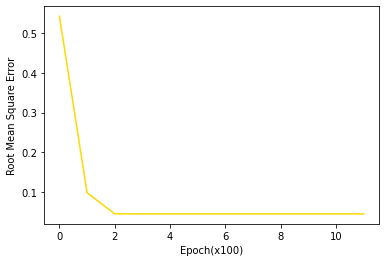

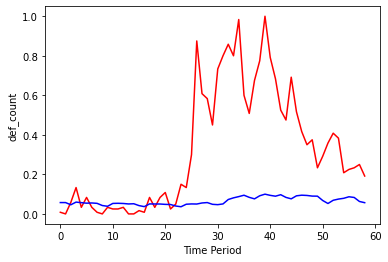

In [25]:
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')

plt.figure(2)
plt.plot(test_Y, 'r')
plt.plot(test_predict, 'b')
plt.xlabel('Time Period')
plt.ylabel('def_count')
plt.show()